In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "Matplot/citydata.csv"
ride_data_to_load = "Matplot/ridedata.csv"




In [17]:
# Read the City and Ride Data
CityData = pd.read_csv("../Matplot/citydata.csv")
RideData = pd.read_csv("../Matplot/ridedata.csv")
# Combine the data into a single dataset
CityData = CityData.drop_duplicates('city', keep = 'first')
# Display the data table for preview
CityData.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [11]:
RideData.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,1/14/2018 10:14,13.83,5.739410e+12
1,South Michelleport,3/4/2018 18:24,30.24,2.343910e+12
2,Port Samanthamouth,2/24/2018 4:29,33.44,2.005070e+12
3,Rodneyfort,2/10/2018 23:22,23.44,5.149250e+12
4,South Jack,3/6/2018 4:28,34.58,3.908450e+12


In [12]:
df = pd.merge(RideData, CityData, on="city")
df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2018 10:14,13.83,5.739410e+12,5,Urban
1,Lake Jonathanshire,4/7/2018 20:51,31.25,4.441250e+12,5,Urban
2,Lake Jonathanshire,3/9/2018 23:45,19.89,2.389500e+12,5,Urban
3,Lake Jonathanshire,4/7/2018 18:09,24.28,7.796810e+12,5,Urban
4,Lake Jonathanshire,1/2/2018 14:14,13.89,4.242550e+11,5,Urban


In [24]:
#percentage of drivers from "type" of city
PercDrivers = df['type'].value_counts(normalize=True)
PercDrivers

Urban       0.684211
Suburban    0.263158
Rural       0.052632
Name: type, dtype: float64

In [7]:
Typedf = df.groupby(['type']).count()["city"]
Typedf.head()

type
Rural        125
Suburban     625
Urban       1625
Name: city, dtype: int64

In [32]:
#group by city name
bycity = df.groupby('city')

#avg fare by city
avg_fare = bycity.mean()['fare']

#rides by city
ride_count = bycity['ride_id'].count()

#num of drivers
driver_count = bycity.mean()['driver_count']

# city type data
city_type = CityData.set_index('city')['type']

# dataframe from above series
city_info = pd.DataFrame({
    "Number of Rides": ride_count,
    "Average Fare": avg_fare,
    "Number of Drivers": driver_count,
    "Type of City": city_type
})
city_info.head()

,Number of Rides,Average Fare,Number of Drivers,Type of City
Amandaburgh,18,24.641667,12,Urban
Barajasview,22,25.332273,26,Urban
Barronchester,16,36.422500,11,Suburban
Bethanyland,18,32.956111,22,Suburban
Bradshawfurt,10,40.064000,7,Rural


## Bubble Plot of Ride Sharing Data

In [26]:
# Obtain the x and y coordinates for each of the three city types

# Build the scatter plots for each city types

# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure


In [35]:
#color scheme dictionary 
color_scheme = {'Gold':'#FFD700', 'Light Sky Blue':'#87CEFA', 'Light Coral':'#F08080'}

In [36]:
#Color Dictionary 
city_color = {'Urban': color_scheme['Gold'], 'Suburban': color_scheme['Light Sky Blue'], 'Rural': color_scheme['Light Coral']}

In [38]:
#separate df by city types
rural = city_info[city_info['Type of City'] == 'Rural']
suburban = city_info[city_info['Type of City'] == 'Suburban']
urban = city_info[city_info['Type of City'] == 'Urban']

Text(0, 0.5, 'Average Fare per City')

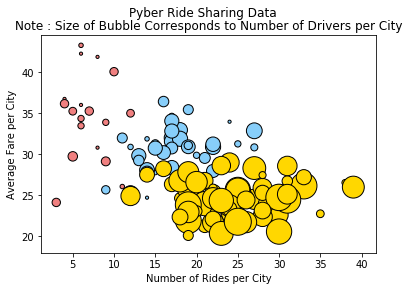

In [48]:
# three scatter plots for each city type
plt.scatter(rural['Number of Rides'], rural['Average Fare'], s = rural['Number of Drivers']*10, color = city_color['Rural'], edgecolor = 'black', label = 'Rural')
plt.scatter(suburban['Number of Rides'], suburban['Average Fare'], s = suburban['Number of Drivers']*10, color = city_color['Suburban'], edgecolor = 'black', label = 'Suburban')
plt.scatter(urban['Number of Rides'], urban['Average Fare'], s = urban['Number of Drivers']*10, color = city_color['Urban'], edgecolor = 'black', label = 'Urban')


#titles & labels
plt.suptitle('Pyber Ride Sharing Data')
plt.title('Note : Size of Bubble Corresponds to Number of Drivers per City')
plt.xlabel('Number of Rides per City')
plt.ylabel('Average Fare per City')

## Total Fares by City Type

In [70]:
by_type = df.groupby('type')['type', 'fare', 'ride_id', 'driver_count']
by_type.head()

,type,fare,ride_id,driver_count
0,Urban,13.83,5.739410e+12,5
1,Urban,31.25,4.441250e+12,5
2,Urban,19.89,2.389500e+12,5
3,Urban,24.28,7.796810e+12,5
4,Urban,13.89,4.242550e+11,5
1625,Suburban,27.79,6.653620e+12,11
1626,Suburban,30.38,2.281520e+12,11
1627,Suburban,36.13,2.660180e+12,11
1628,Suburban,44.24,1.252890e+12,11
1629,Suburban,36.49,4.031570e+12,11


In [75]:
# Calculate Type Percents

#total fare by cities 
TotFare = by_type.sum()['fare']
TotFare



type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

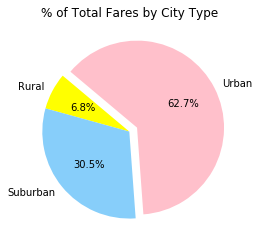

In [96]:
# Build Pie Chart
plt.pie(TotFare, startangle = 140, colors = colors, explode = explode, labels = labels, autopct = "%1.1f%%")

#colors and labels 
colors = ['yellow', 'lightskyblue', 'pink']
labels = 'Rural', 'Suburban', 'Urban'
explode = [0 , 0, .1]


plt.title('% of Total Fares by City Type')
plt.show()



In [34]:
# Show Figure
plt.show()

## Total Rides by City Type

In [105]:
# Calculate Ride Percents
TotalRides = by_type.count()['ride_id']
TotalRides.head()



type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

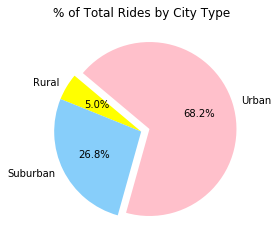

In [103]:
plt.pie(TotalRides, startangle = 140, colors = colors, explode = explode, labels = labels, autopct = "%1.1f%%")
#colors and labels
colors = ['yellow', 'lightskyblue', 'pink']
labels = 'Rural', 'Suburban', 'Urban'
explode = [0 , 0, .1]


#pie chart display
plt.title('% of Total Rides by City Type')
plt.show()


## Total Drivers by City Type

In [106]:
# Calculate Driver Percents
TotalDrivers = by_type.count()['driver_count']
TotalRides.head()


type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [108]:
TotDrivers = CityData.groupby('type').sum()['driver_count']
TotDrivers

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

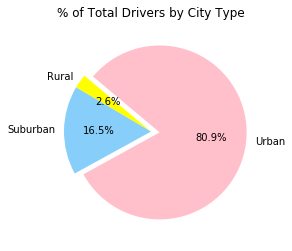

In [110]:
# Build Pie Charts
plt.pie(TotDrivers, startangle = 140, colors = colors, explode = explode, labels = labels, autopct = "%1.1f%%")

#colors and labels
colors = ['yellow', 'lightskyblue', 'pink']
labels = 'Rural', 'Suburban', 'Urban'
explode = [0 , 0, .1]



plt.title('% of Total Drivers by City Type')
plt.show()


